<a href="https://colab.research.google.com/github/Gautam-flash/machine_learning/blob/master/ML_project%2B1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML project using the weather data of bangalore

In [0]:
import numpy as np
import csv
import tensorflow as tf
from tensorflow import keras
import pandas as pd

 Download and save the CSV file in Google drive. And remember the path.
In below step click on link, allow access to drive and copy paste the auth in the input prompt.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
df = pd.read_csv('location of CSV file in drive')

ParserError: ignored

In [0]:
#df.head()

In [0]:
#df.keys()

In [0]:
columns_to_keep = ['date_time',
                   'maxtempC',
                   'mintempC',
                   'sunHour',
                   'humidity',
                   'pressure',
                   'tempC']

In [0]:
df = df[columns_to_keep]
#df.head()

In [0]:
df = df.set_index("date_time")
#df.head(1)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import warnings

In [0]:
train, test = df[:-25000], df[-25000:]

In [0]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [0]:
n_features = 6
n_input = 12

generator = keras.preprocessing.sequence.TimeseriesGenerator(train, train, length = n_input, batch_size = 300)

model = tf.keras.Sequential([keras.layers.Dense(units=250)])
model.add(keras.layers.LSTM(6, activation='relu', input_shape = (n_input, n_features)))
model.add(keras.layers.Dropout(0.05))
model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])

model.fit(generator, epochs = 50)

Epoch 1/50
239/239 [==============================] - 8s 34ms/step - loss: 0.0364 - accuracy: 0.7434
Epoch 2/50
239/239 [==============================] - 8s 34ms/step - loss: 0.0215 - accuracy: 0.8512
Epoch 3/50
239/239 [==============================] - 8s 34ms/step - loss: 0.0205 - accuracy: 0.8627
Epoch 4/50
239/239 [==============================] - 8s 34ms/step - loss: 0.0201 - accuracy: 0.8713
Epoch 5/50
239/239 [==============================] - 8s 34ms/step - loss: 0.0199 - accuracy: 0.8749
Epoch 6/50
239/239 [==============================] - 8s 34ms/step - loss: 0.0196 - accuracy: 0.8754
Epoch 7/50
239/239 [==============================] - 8s 34ms/step - loss: 0.0198 - accuracy: 0.8744
Epoch 8/50
239/239 [==============================] - 8s 34ms/step - loss: 0.0196 - accuracy: 0.8803
Epoch 9/50
239/239 [==============================] - 8s 34ms/step - loss: 0.0193 - accuracy: 0.8828
Epoch 10/50
239/239 [==============================] - 8s 33ms/step - loss: 0.0191 - accura

In [0]:
#generator1 = keras.preprocessing.sequence.TimeseriesGenerator(test, test, length = n_input, batch_size = 100)
#model.evaluate(generator1)

250/250 [==============================] - 1s 6ms/step - loss: 0.0022


0.0022146424744278193

In [0]:
pred_list1 = []
batch1 = train[-n_input:].reshape((1, n_input, n_features))

for i in range(30):
    pred_list1.append(model.predict(batch1)[0])
    batch1 = np.append(batch1[:, 1:,:], [[pred_list1[i]]], axis = 1)

In [0]:
# pred_list = []
#batch = test[-n_input:].reshape((1, n_input, n_features))

#for i in range(30):
#    pred_list.append(model.predict(batch)[0])
#    batch = np.append(batch[:, 1:,:], [[pred_list[i]]], axis = 1)

#np.shape(scaler.inverse_transform(pred_list))
#dfpredict1 = pd.DataFrame(scaler.inverse_transform(pred_list), index = df[-30:].index, columns=['PtempM','Ptempm', 'PsunH','Phum','Ppressure','Ptemp'])
#df_test1 = pd.concat([df, dfpredict1], axis = 1)
#dtest1 = df_test1[-30:] ####


In [0]:
np.shape(scaler.inverse_transform(pred_list1))

(30, 6)

In [0]:
dfpredict = pd.DataFrame(scaler.inverse_transform(pred_list1), index = df[-30:].index, columns=['PtempM','Ptempm', 'PsunH','Phum','Ppressure','Ptemp'])

In [0]:
dfpredict.head(60)

,PtempM,Ptempm,PsunH,Phum,Ppressure,Ptemp
date_time,,,,,,
2019-12-31 18:00:00,33.280257,16.589880,11.243802,24.905455,1013.501061,28.626008
2019-12-31 19:00:00,32.669317,16.331139,10.950751,22.686285,1011.886880,29.490245
2019-12-31 20:00:00,32.129242,16.101671,10.683669,23.094285,1010.444888,29.402153
2019-12-31 21:00:00,31.632598,15.894175,10.436391,25.144258,1009.335406,28.359174
2019-12-31 22:00:00,31.163904,15.703460,10.205458,28.528172,1008.712784,26.703667
2019-12-31 23:00:00,30.719575,15.529301,9.994598,33.034288,1008.572043,24.787947
2020-01-01 00:00:00,30.294320,15.367947,9.806097,38.364008,1008.782955,22.862038
2020-01-01 01:00:00,29.881432,15.212636,9.638224,44.049635,1009.165856,21.102921
2020-01-01 02:00:00,29.475810,15.055438,9.485551,49.337030,1009.545809,19.637456


In [0]:
df_test = pd.concat([df, dfpredict], axis = 1)

In [0]:
#df_test.tail(31)

In [0]:
dtest = df_test[-30:]
#dtest.head()


<function matplotlib.pyplot.show>

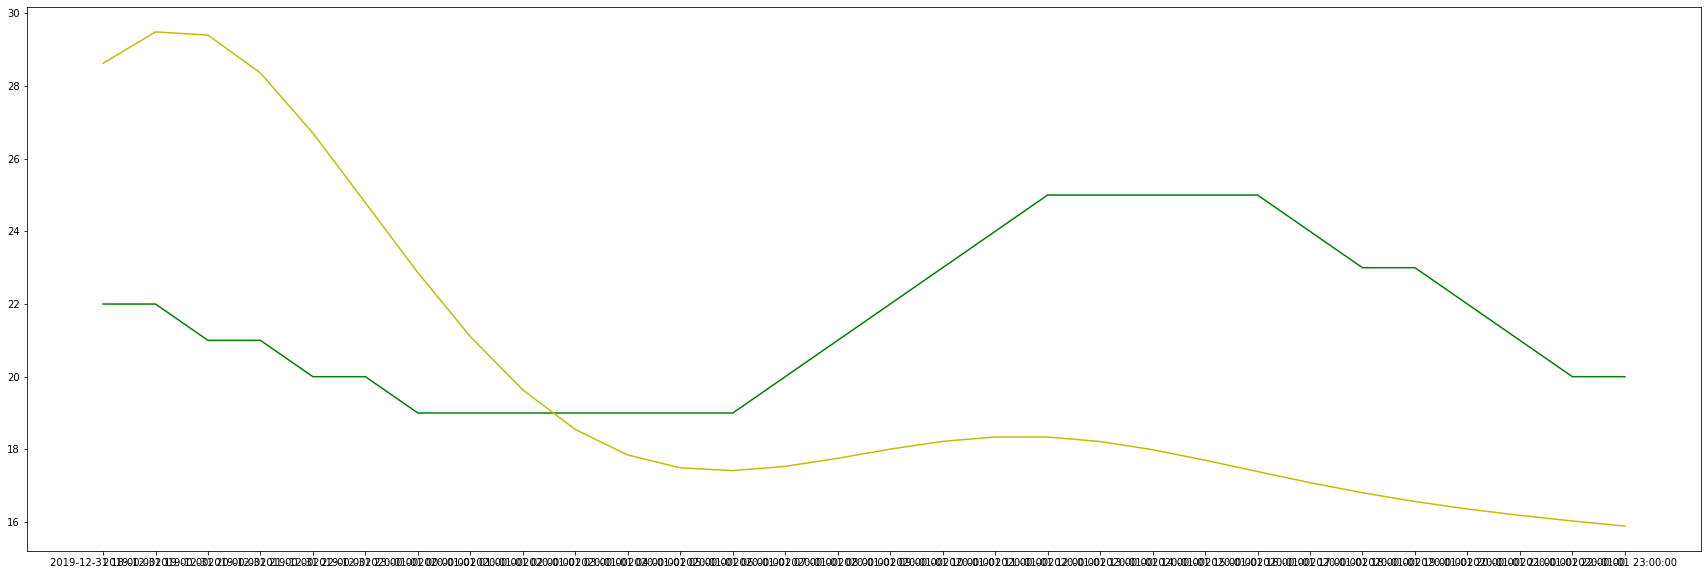

In [0]:
plt.figure(figsize=(30,10))
plt.plot(dtest.index, dtest['tempC'], color = 'g')
#plt.plot(dtest.index, dtest1['Ptemp'], color = 'r')
plt.plot(dtest.index, dtest['Ptemp'], color = 'y')
plt.show

In [0]:
add_dates = [pd.Timestamp(df.index[-1]) + pd.tseries.offsets.DateOffset(days = x) for x in range(0,151)]
future_dates = pd.DataFrame(index = add_dates[1:], columns = df.columns)
future_dates.tail()

,maxtempC,mintempC,sunHour,humidity,pressure,tempC
2020-05-26 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-27 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-28 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-29 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-30 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list1),
                index = future_dates[-30:].index, columns = ['PtempM','Ptempm','PsunH','Phum','Ppressure','Ptemp'])

df_proj = pd.concat([df, df_predict], axis = 1)

In [0]:
df_proj.tail(40)

,maxtempC,mintempC,sunHour,humidity,pressure,tempC,PtempM,Ptempm,PsunH,Phum,Ppressure,Ptemp
2020-01-01 14:00:00,26.0,18.0,8.7,60.0,1013.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 15:00:00,26.0,18.0,8.7,61.0,1012.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,26.0,18.0,8.7,65.0,1013.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 17:00:00,26.0,18.0,8.7,68.0,1013.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 18:00:00,26.0,18.0,8.7,72.0,1014.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 19:00:00,26.0,18.0,8.7,76.0,1014.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 20:00:00,26.0,18.0,8.7,81.0,1015.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 21:00:00,26.0,18.0,8.7,86.0,1016.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 22:00:00,26.0,18.0,8.7,88.0,1016.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 23:00:00,26.0,18.0,8.7,89.0,1016.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
